In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
h = 1
x_0 = 0.5
l = 0.1
c = 1
contador = 30

In [28]:
# Modelos populacionais
def malthus (x):
    xlinha = l*x
    return xlinha

def verhulst (x):
    v = l*x*(1-x)
    return v

def gompertz (x):
    g = (l*x) * np.log(1/x)
    return g

In [29]:
# Soluções Analíticas

def an_malt(x_0, contador):
    
    lista = []
    lista.append(x_0)
    
    for _ in range(contador):
        x = x_0 * np.exp(l * (_ + 1))
        lista.append(x)
        
    return lista

def an_verh(x_0, contador):
    
    lista = []
    lista.append(x_0)
    
    for _ in range(1, contador):
        x = (c * (np.exp(l * _))/(1 + (c * np.exp(l * _))))
        lista.append(x)
        
    return lista

def an_gomp(x_0, contador):
    
    lista = []
    lista.append(x_0)
    
    for _ in range(contador):
        x = np.exp(np.log(x_0) * np.exp((- _ - 1) * l))
        lista.append(x)
        
    return lista

In [30]:
# Método de aproximação de Euler em cada modelo:

# Euler - Malthus
def euler_m(x_0,h,contador):
    """ Função que aplica o método de Euler nas equações populacionais
    
    Args:
        x_0 = valor inicial
        h = passos dados
        
    Returns:
        Uma lista contendo a aproximação feita pelo método de Euler para as equações populacionais, e outra lista contendo a quantidade de iterações feitas para aproximar
    """

    lista = []
    lista.append(x_0)
    
    for _ in range(contador):
        em = x_0 + h * malthus(x_0)
        x_0 = em
        lista.append(x_0)
        
    return lista

# Euler - Verhulst
def euler_v(x_0, h, contador):
    
    lista = []
    lista.append(x_0)
    
    for _ in range(contador):
        ev = x_0 + h * verhulst(x_0)
        x_0 = ev
        lista.append(x_0)
        
    return lista

#Euler - Gompertz
def euler_g(x_0, h, contador):
    
    lista = []
    lista.append(x_0)
    
    for _ in range(contador):
        eg = x_0 + h * gompertz(x_0)
        x_0 = eg
        lista.append(x_0)
        
    return lista

In [39]:
print("Euler - Malthus")
print(euler_m(x_0, h, contador))
print()
print("Euler - Verhulst")
print(euler_v(x_0, h, contador))
print()
print("Euler - Gompertz")
print(euler_g(x_0, h, contador))

Euler - Malthus
[0.5, 0.55, 0.6050000000000001, 0.6655000000000001, 0.7320500000000001, 0.805255, 0.8857805000000001, 0.97435855, 1.0717944050000001, 1.1789738455, 1.29687123005, 1.4265583530550001, 1.5692141883605002, 1.7261356071965501, 1.8987491679162052, 2.088624084707826, 2.2974864931786083, 2.527235142496469, 2.779958656746116, 3.0579545224207276, 3.3637499746628006, 3.7001249721290805, 4.070137469341988, 4.477151216276187, 4.924866337903806, 5.417352971694187, 5.9590882688636055, 6.554997095749966, 7.210496805324963, 7.93154648585746, 8.724701134443206]

Euler - Verhulst
[0.5, 0.525, 0.5499375, 0.574688124609375, 0.5991302930136084, 0.6231476115143121, 0.646631078092144, 0.6694810107858976, 0.6916086294841967, 0.7129372427949154, 0.7334030158580054, 0.7529553190768441, 0.7715566797319173, 0.789182376701215, 0.8058197320017587, 0.821467161153596, 0.8361330475835808, 0.8498345050157982, 0.8625960869258333, 0.8744484947004407, 0.8854273271820982, 0.8955719047282246, 0.9049241915471

In [32]:
# Método de aproximação Runge - Kutta em cada modelo

# Runge Kutta - Malthus
def rkm(x_0, h, contador):
    
    lista = []
    lista.append(x_0)
    
    for _ in range(contador):
        k1 = malthus(x_0)
        k2 = malthus(x_0 + (h/2) * k1)
        k3 = malthus(x_0 + (h/2) * k2)
        k4 = malthus(x_0 + (h * k3))
        
        rk = x_0 + ((h/6) * (k1 + (2 * k2) + (2 * k3) + k4))
        x_0 = rk
        
        lista.append(x_0)
        
    return lista

# Runge Kutta - Verhulst
def rkv(x_0, h, contador):
    
    lista = []
    lista.append(x_0)
    
    for _ in range(contador):
        k1 = verhulst(x_0)
        k2 = verhulst(x_0 + (h/2) * k1)
        k3 = verhulst(x_0 + (h/2) * k2)
        k4 = verhulst(x_0 + (h * k3))
        
        rk = x_0 + ((h/6) * (k1 + (2 * k2) + (2 * k3) + k4))
        x_0 = rk
        
        lista.append(x_0)
        
    return lista

# Runge Kutta - Gompertz
def rkg(x_0, h, contador):
    
    lista = []
    lista.append(x_0)
    
    for _ in range(contador):
        k1 = gompertz(x_0)
        k2 = gompertz(x_0 + (h/2) * k1)
        k3 = gompertz(x_0 + (h/2) * k2)
        k4 = gompertz(x_0 + (h * k3))
        
        rk = x_0 + ((h/6) * (k1 + (2 * k2) + (2 * k3) + k4))
        x_0 = rk
        
        lista.append(x_0)
        
    return lista

In [40]:
print("Runge Kutta - Malthus")
print(rkm(x_0, h, contador))
print()
print("Runge Kutta - Verhulst")
print(rkv(x_0, h, contador))
print()
print("Runge Kutta - Gompertz")
print(rkg(x_0, h, contador))

Runge Kutta - Malthus
[0.5, 0.5525854166666667, 0.6107012854253473, 0.6749292485312689, 0.7459121200403429, 0.8243603192984191, 0.9110589810459666, 1.0068758132983884, 1.1127697816461577, 1.2298007068900354, 1.359139872067583, 1.5020817450294905, 1.6600569338890296, 1.8346465050069172, 2.027597806810582, 2.2408419578176897, 2.4765131738896744, 2.73697012814863, 3.024819557334461, 3.342942350862291, 3.6945223836877705, 4.083078381548867, 4.512499137501679, 4.987082432208679, 5.5115780475060925, 6.091235303744014, 6.731855596668192, 7.439850459649449, 8.222305732366165, 9.087052478160558, 10.042745359832436]

Runge Kutta - Verhulst
[0.5, 0.5249791861755524, 0.5498339946708539, 0.574442512752473, 0.5986876545159727, 0.6224593239147748, 0.6456562970704296, 0.6681877609534379, 0.6899744676611106, 0.7109494867252997, 0.7310585601384104, 0.7502600843861292, 0.7685247594888148, 0.7858349561951136, 0.8021838588891407, 0.8175744437695538, 0.8320183500729706, 0.845534697383036, 0.8581488952990214

In [34]:
# Soluções analíticas

print(an_malt(x_0, contador))
print()
print(an_verh(x_0, contador))
print()
print(an_gomp(x_0, contador))

[0.5, 0.5525854590378239, 0.6107013790800849, 0.6749294037880016, 0.7459123488206352, 0.8243606353500641, 0.9110594001952546, 1.0068763537352383, 1.112770464246234, 1.229801555578475, 1.3591409142295225, 1.5020830119732167, 1.660058461368274, 1.8346483338096222, 2.0275999834223377, 2.2408445351690323, 2.4765162121975575, 2.7369736958636004, 3.0248237322064733, 3.342947221139635, 3.694528049465325, 4.083084956283825, 4.512506749717061, 4.987091227407362, 5.511588190320802, 6.091246980351737, 6.731869017500846, 7.4398658624364185, 8.222323385548528, 9.087072684721534, 10.042768461593834]

[0.5, 0.52497918747894, 0.549833997312478, 0.574442516811659, 0.598687660112452, 0.6224593312018546, 0.6456563062257955, 0.6681877721681662, 0.6899744811276125, 0.710949502625004, 0.7310585786300049, 0.7502601055951176, 0.7685247834990176, 0.7858349830425586, 0.8021838885585818, 0.8175744761936437, 0.8320183851339245, 0.8455347349164654, 0.8581489350995122, 0.8698915256370021, 0.8807970779778824, 0.8909

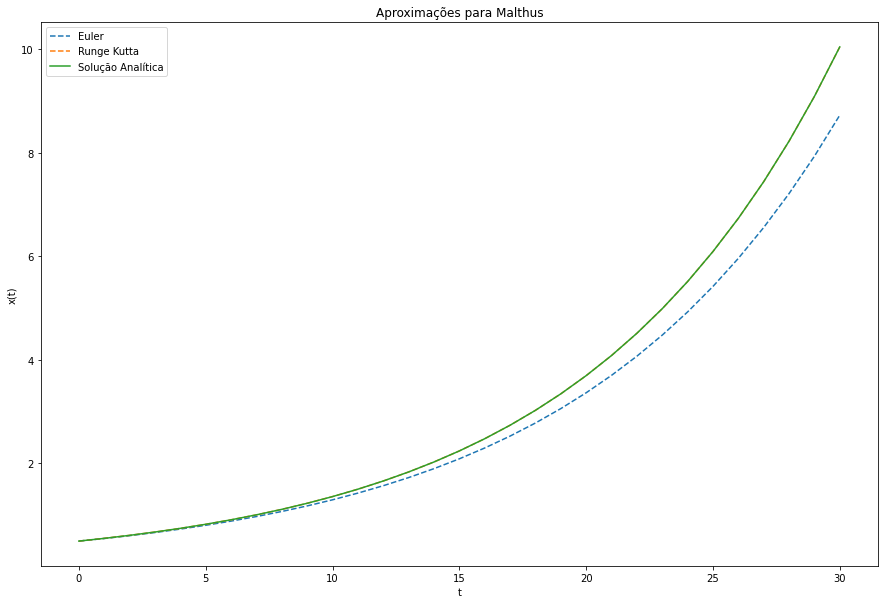

In [48]:
# Plotando as aproximações dos métodos com relação à solução analítica

# Aproximações para Malthus
plt.figure(figsize = (15,10))
plt.plot(euler_m(x_0, h, contador), "--", label = "Euler")
plt.plot(rkm(x_0, h, contador), "--", label = "Runge Kutta")
plt.plot(an_malt(x_0, contador), label = "Solução Analítica")
plt.title("Aproximações para Malthus")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()

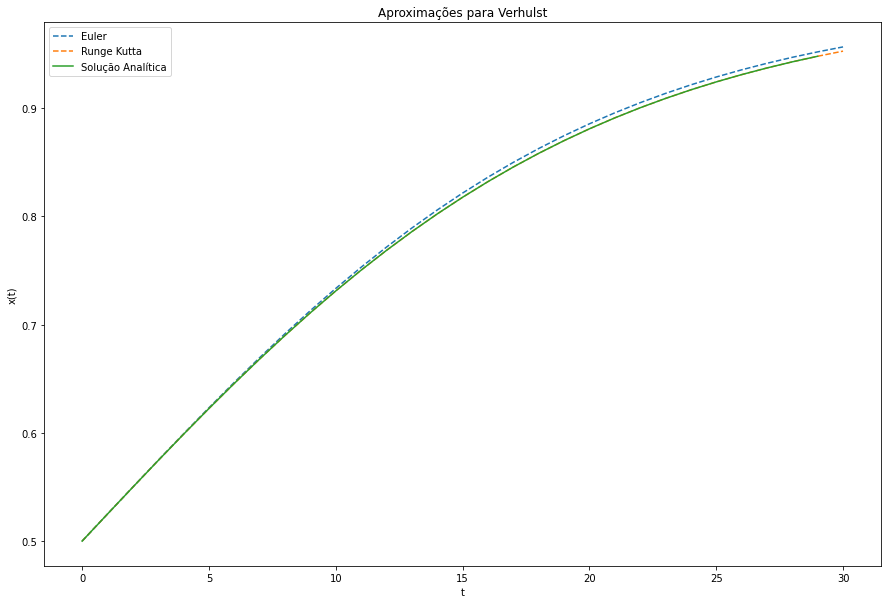

In [49]:
# Aproximações para Verhulst

plt.figure(figsize = (15,10))
plt.plot(euler_v(x_0, h, contador), "--", label = "Euler")
plt.plot(rkv(x_0, h, contador), "--", label = "Runge Kutta")
plt.plot(an_verh(x_0, contador), label = "Solução Analítica")
plt.title("Aproximações para Verhulst")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()

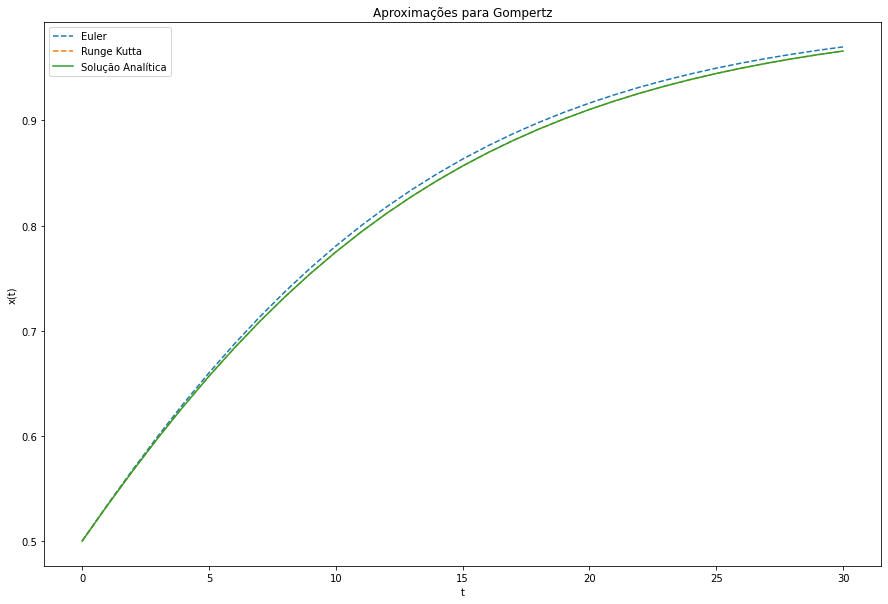

In [51]:
# Aproximações para Gompertz

plt.figure(figsize = (15,10))
plt.plot(euler_g(x_0, h, contador), "--", label = "Euler")
plt.plot(rkg(x_0, h, contador), "--", label = "Runge Kutta")
plt.plot(an_gomp(x_0, contador), label = "Solução Analítica")
plt.title("Aproximações para Gompertz")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()